___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [2]:
# Importing the libraries for EDA
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import interact
%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("darkgrid")
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.1f' % x)



#Tell Tensor we don't have a GPU Device.
import os
#os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" #If the line below doesn't work, uncomment this line (make sure to comment the line below); it should help.
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


# Importing libraries for DL and ML
#import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score,\
                            f1_score, precision_recall_curve,\
                            average_precision_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV,\
                                    HalvingGridSearchCV,\
                                    RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,\
                                  OneHotEncoder
from sklearn.compose import ColumnTransformer
from livelossplot import PlotLossesKerasTF

print("Imports done!")

2023-01-25 22:14:44.510149: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-25 22:14:44.949236: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-25 22:14:44.949250: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-25 22:14:45.999764: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Imports done!


# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [46]:
print("Loading fashion_mnist.load_data() ... ",end="")

from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("done!")

Loading fashion_mnist.load_data() ... done!


In [47]:
y_test.shape

(10000,)

In [5]:
print("len(x_train)= ", len(x_train))
print("len(x_test) = ", len(x_test))


len(x_train)=  60000
len(x_test) =  10000


In [48]:
x_train[5].shape

(28, 28)

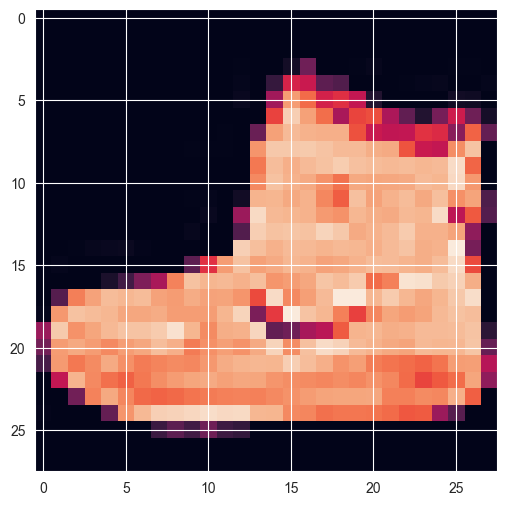

In [7]:
plt.imshow(x_train[0])

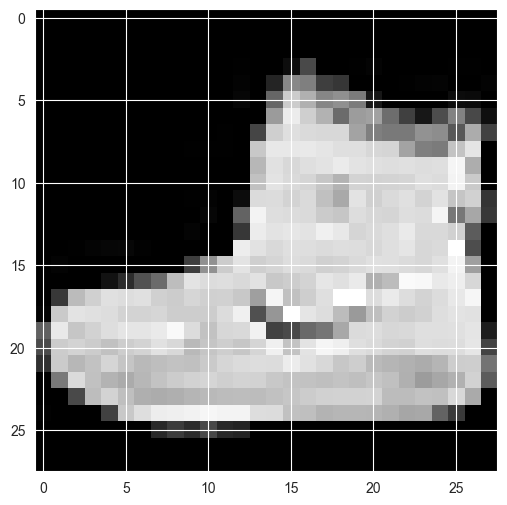

In [8]:
plt.imshow(x_train[0], cmap='gray')

In [9]:
x_train[11]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  39, 111,  93,  85,  27,   0,   0,   0,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0, 190, 244, 248, 255, 255, 155, 202, 212, 150,   9,   0,   3,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,
          0, 213, 227, 233, 227, 243, 246, 255, 250, 255, 146,   0,   9,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,
          6, 244, 233, 236, 244, 232, 214, 248, 242, 251,  33,   0,   7,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   6,   0,
         72, 255, 231, 239, 244, 237, 226, 255, 252, 207,  44,  24,   0,
          2,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        125, 231, 215, 253, 252, 234, 246, 254, 239, 128, 114,  63,   0,
          3,   0],
       [  

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
y_train[0]

9

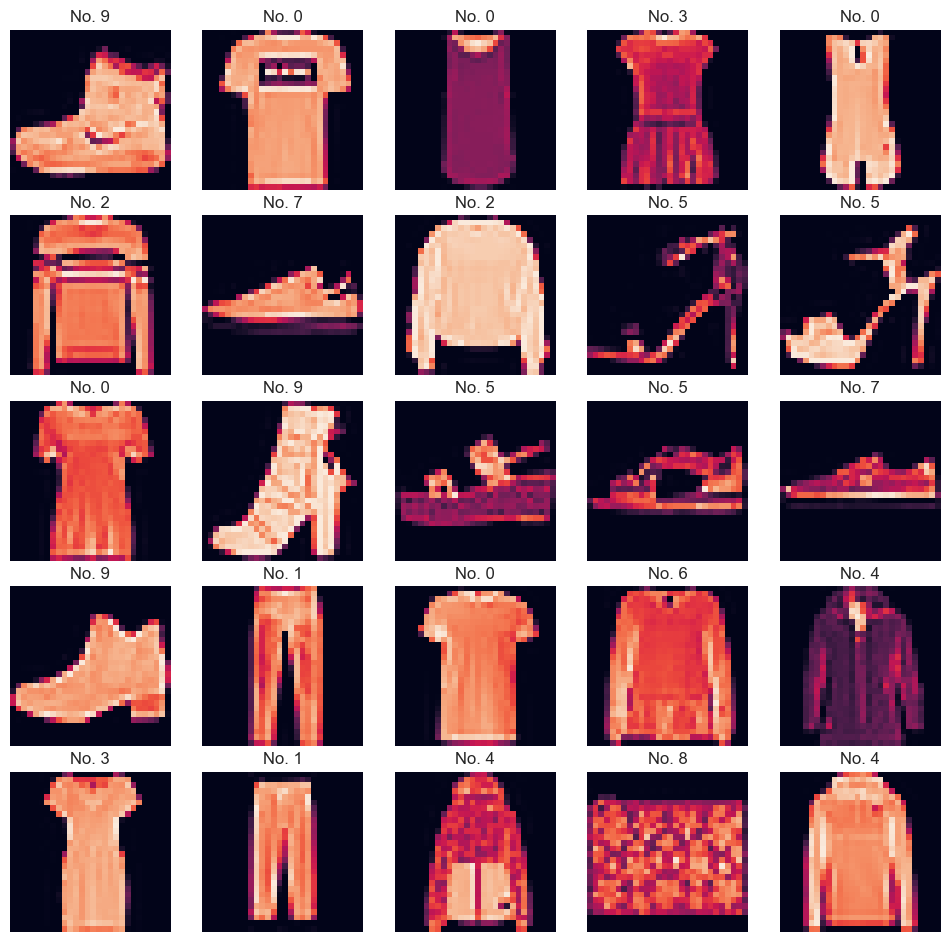

In [12]:
num_rows,num_cols = 5, 5
f, ax = plt.subplots(num_rows,
                     num_cols, 
                     figsize = (12,12),
                     gridspec_kw = {'wspace':0.2, 'hspace':0.02},
                     squeeze = True
                    )

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r* num_cols + c 
        ax[r,c].axis('off')
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow(x_train[image_index])
        
plt.show()
plt.close()

In [49]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [14]:
len(classes)

10

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [15]:
print("x_train[0].min() = ", x_train[0].min())
print("x_train[0].max() = ", x_train[0].max())

x_train[0].min() =  0
x_train[0].max() =  255


In [16]:
x_train[0].shape

(28, 28)

In [50]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [18]:
print("scaled x_train[0].min() = ", x_train[0].min())
print("scaled x_train[0].max() = ", x_train[0].max())

scaled x_train[0].min() =  0.0
scaled x_train[0].max() =  1.0


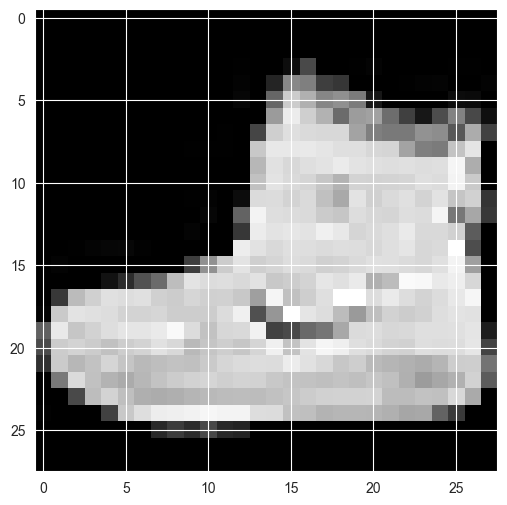

In [19]:
plt.imshow(x_train[0], cmap='gray')

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [20]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [21]:
x_train.reshape(x_train.shape[0], 28,28,1)

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [51]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test  = x_test.reshape(x_test.shape[0], 28,28,1)


In [23]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [24]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [25]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [52]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

print(y_train.shape)
print(y_test[0])
y_train[0]


(60000, 10)
9


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [27]:
x_train[0].shape

(28, 28, 1)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten


In [29]:
model = Sequential()


model.add(Conv2D(filters = 28, kernel_size=(3,3),
          input_shape = (28,28,1),
          activation = 'relu'
         ))

model.add(MaxPool2D(pool_size=(2,2), strides = (1,1)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])




2023-01-25 22:14:49.440840: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-25 22:14:49.444663: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-25 22:14:49.444692: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ihsan-B450M-S2H): /proc/driver/nvidia/version does not exist
2023-01-25 22:14:49.445816: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
______________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy',
                           mode = 'max', patience=2,
                           restore_best_weights=True
                          )

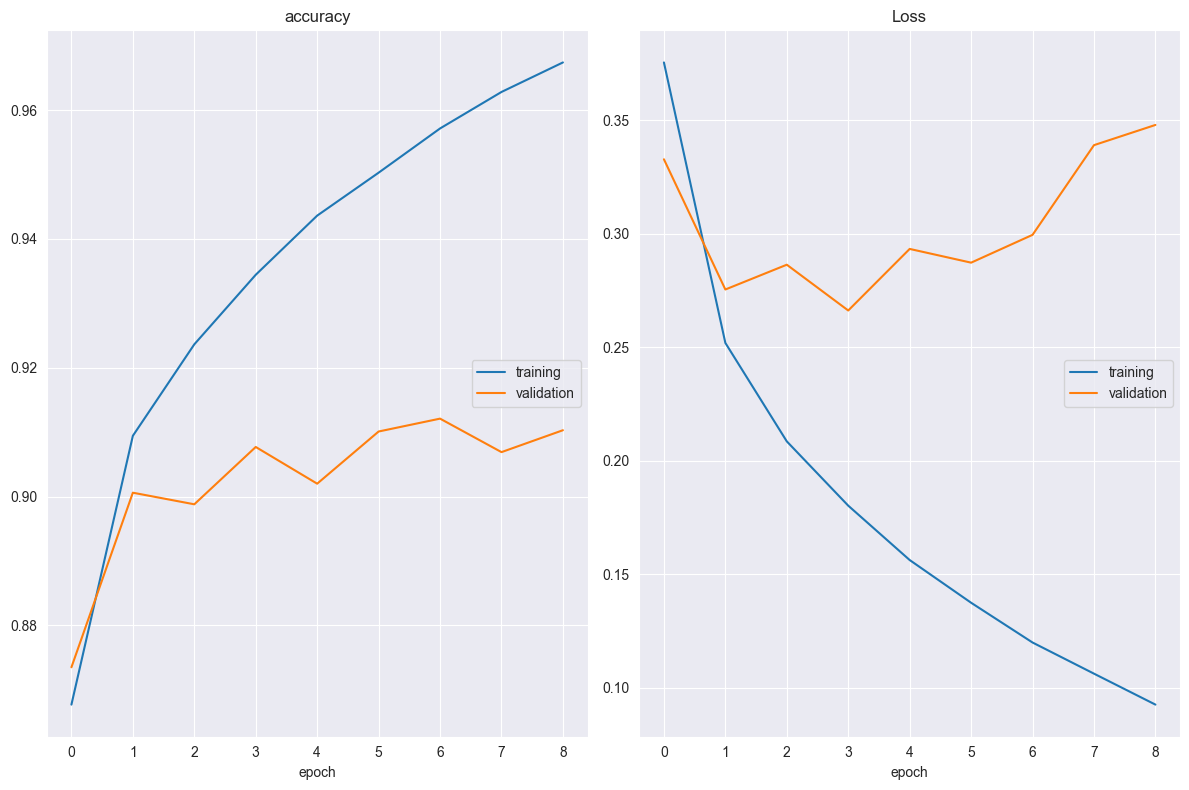

accuracy
	training         	 (min:    0.868, max:    0.967, cur:    0.967)
	validation       	 (min:    0.873, max:    0.912, cur:    0.910)
Loss
	training         	 (min:    0.093, max:    0.376, cur:    0.093)
	validation       	 (min:    0.266, max:    0.348, cur:    0.348)
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0925 - accuracy: 0.9674 - val_loss: 0.3480 - val_accuracy: 0.9103


In [32]:
model.fit( x_train,
          y_train,
          batch_size=32,
          epochs=10,
          validation_data=(x_test,y_test),
          callbacks=[early_stop,PlotLossesKerasTF()]
         )

**TASK 7: Plot values of metrics you used in your model.**

In [33]:
x_train.shape

(60000, 28, 28, 1)

In [34]:
y_train.shape

(60000, 10)

In [35]:
model.metrics_names

['loss', 'accuracy']

In [36]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.4,0.9,0.3,0.9
1,0.3,0.9,0.3,0.9
2,0.2,0.9,0.3,0.9
3,0.2,0.9,0.3,0.9
4,0.2,0.9,0.3,0.9


<AxesSubplot: >

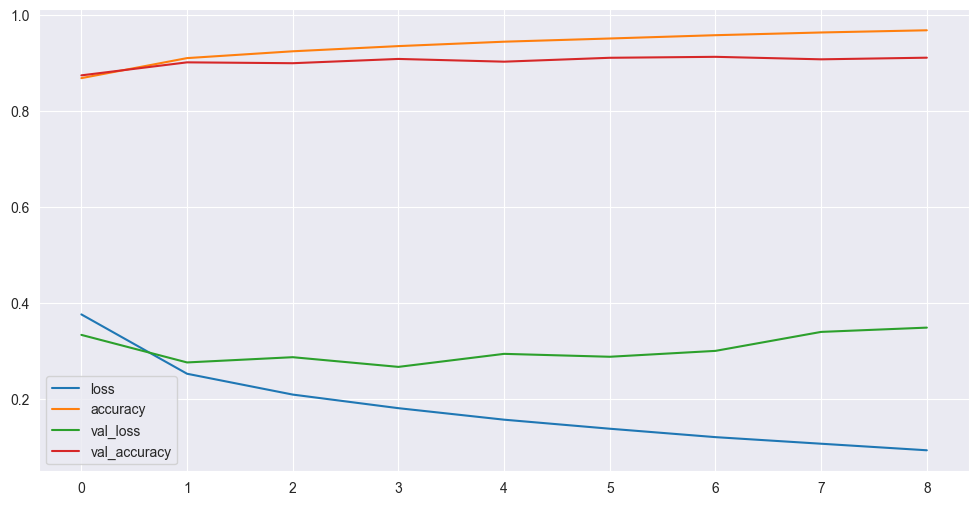

In [37]:
summary.plot()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

In [39]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.2995699346065521, 0.9121000170707703]

In [40]:
pred_prob = model.predict(x_test); pred_prob


313/313 [==============================] - 1s 3ms/step


array([[8.6924326e-09, 7.9616744e-11, 6.5871767e-08, ..., 5.5240085e-05,
        6.0073058e-09, 9.9994355e-01],
       [6.0889969e-09, 7.3129392e-18, 9.9999994e-01, ..., 5.6500025e-13,
        1.5711535e-20, 2.9671757e-14],
       [2.5919311e-09, 9.9999994e-01, 4.0113652e-11, ..., 3.1841019e-12,
        5.2955373e-11, 6.1373298e-12],
       ...,
       [1.0197889e-12, 2.1453048e-17, 2.1220918e-13, ..., 5.8549651e-11,
        9.9999994e-01, 1.8249402e-11],
       [5.6613386e-10, 9.9999994e-01, 4.5580906e-13, ..., 3.8612746e-12,
        1.7206551e-12, 1.1494316e-10],
       [7.2328607e-03, 9.2706941e-06, 1.4922991e-03, ..., 4.9200773e-02,
        1.3465583e-03, 1.5683880e-03]], dtype=float32)

In [41]:
pred_prob.shape

(10000, 10)

In [42]:
pred_prob[0]

array([8.6924326e-09, 7.9616744e-11, 6.5871767e-08, 3.7841869e-10,
       1.7581940e-09, 1.0816938e-06, 3.5109096e-08, 5.5240085e-05,
       6.0073058e-09, 9.9994355e-01], dtype=float32)

In [43]:
np.argmax(pred_prob[0])

9

In [44]:
y_pred = np.argmax(pred_prob, axis= 1); y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [45]:
y_pred.shape

(10000,)

In [134]:
y_test.shape

(10000, 10)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.84      0.88      0.86      1000
           3       0.92      0.93      0.92      1000
           4       0.86      0.84      0.85      1000
           5       0.99      0.97      0.98      1000
           6       0.79      0.72      0.75      1000
           7       0.95      0.98      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [55]:
print(confusion_matrix(y_test,y_pred))

[[891   0   9  10   2   2  83   1   2   0]
 [  1 981   1  11   2   0   2   0   2   0]
 [ 24   0 877  10  42   0  47   0   0   0]
 [ 14   4  11 926  21   0  21   0   2   1]
 [  2   0  93  28 843   0  32   0   0   2]
 [  0   0   0   0   0 966   0  15   0  19]
 [129   0  53  23  66   0 721   0   8   0]
 [  0   0   0   0   0   4   0 976   0  20]
 [  4   0   2   4   3   1   4   4 978   0]
 [  1   0   0   0   0   2   0  35   0 962]]


<AxesSubplot: >

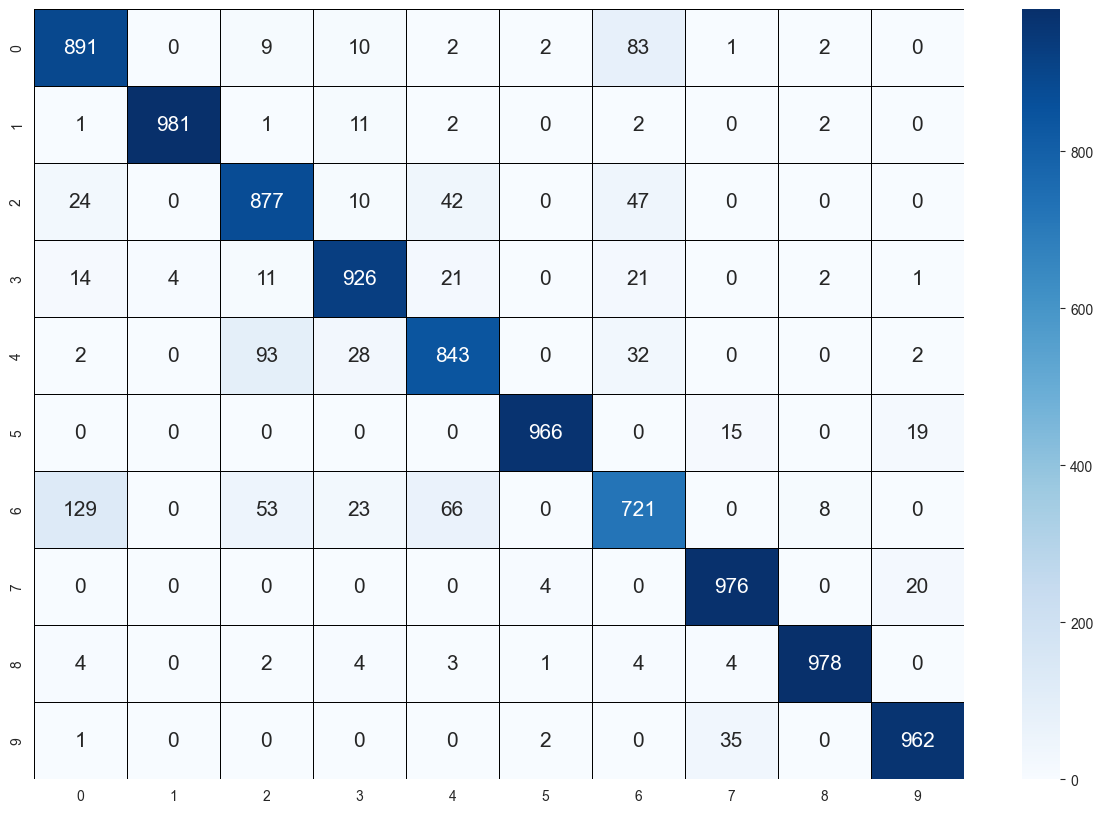

In [56]:
plt.figure(figsize=(15,10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot = True,
    cmap = 'Blues',
    linewidth = .5,
    linecolor ='black',
    fmt='g',
    annot_kws = {"size":15}
)

## Prediction

In [57]:
my_cloth = x_test[11]
my_cloth.shape


(28, 28, 1)

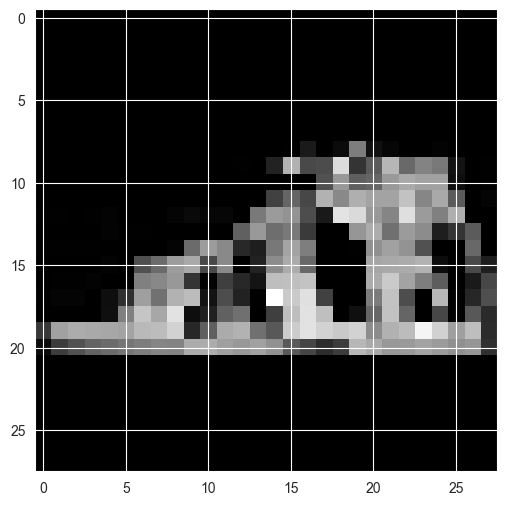

In [58]:
plt.imshow(my_cloth.reshape(28,28), cmap='gray')

In [59]:
pred_prob = model.predict(my_cloth.reshape(1,28,28,1))
pred_prob

1/1 [==============================] - 0s 14ms/step


array([[2.5320179e-09, 1.3610046e-11, 4.9618776e-09, 6.0865132e-11,
        1.2006325e-09, 9.9998784e-01, 6.2918053e-11, 9.6805052e-06,
        1.6712594e-08, 2.4499525e-06]], dtype=float32)

In [61]:
y_pred = np.argmax(pred_prob)
classes[y_pred]

'Sandal'

In [62]:
model.save("ccn_hw2.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___